Please read carefully. Ask questions if you are unsure.



We use an auto-grader to check your work. If you invent new notation (such as, new variable names) for yourself, you will mess up the auto-grader and receive no points. We will NOT do manual regrades because of failure to use the requested variable names.



Do not reinitialize variables and data provided for you. Please just run the cells when information is initialized for you. DO NOT RETYPE IT unless it is in a static cell (a cell that has no run button).



Take some time to understand what it is your code is doing and what should output so you can check your answers before submission.



**Your code must run (no errors), and you must demonstrate the** **least squares pipeline** **correctly.**





---



In [1]:
#provided code for your use :) 
using LinearAlgebra, Plots

function backwardSub(A, b)
    
    (rows, cols) = size(A)
    if rows != cols
        println("A is not a square")
        return 0
    end
    if rows != length(b)
        println("A and b are not size compatible")
        return 0
    end
  
     for i in 1:length(b)
        for j in 1:length(b)
            if  i > j
                if !isapprox(A[i,j],0,atol=1E-17)
                    println("A is not upper triangular")
                    return 0
                end
            elseif j == i
                if isapprox(A[i,j],0,atol=1E-17)
                    println("There is a zero on the diagonal of A")
                    return 0
                end
            end
        end
    end

    n = length(b)
    x = Vector{Float64}(undef, n) 
    x[n] = b[n]/A[n,n]
    for i in n-1:-1:1
        x[i]=(b[i]- (A[i,(i+1):n])' *x[(i+1):n] )./A[i,i]
    end
    return x
end

function forwardSub(A,b)
  nRows, nCols = size(A)
  if nRows != nCols
    println("A is not square")
    return 0
  elseif nRows != length(b)
    println("A and b are not size compatible")
    return 0
  end

  for i in 1:length(b)
        for j in 1:length(b)
            if j > i
                if !isapprox(A[i,j],0,atol=1E-17)
                    println("A is not lower triangular")
                    return 0
                end
            elseif j == i
                if isapprox(A[i,j],0,atol=1E-17)
                    println("There is a zero on the diagonal of A")
                    return 0
                end
            end
        end
    end
    
  x = 0.0 * b
  nRows, nCols = size(A)
  for k = 1:nRows
    x[k] = (b[k]-((A[k:k,:]*x)[1]))/A[k,k]
  end

  return x
end

forwardSub (generic function with 1 method)



---



View this video for context: [02 Linear Regression Real World Example - YouTube](https://www.youtube.com/watch?v=fjGO3mrjskc)



Here is the linear regression from the video provided for you:



Here is alphaStar:
alphaStar = [2.787844827586206, 29.44913793103449]

 Here is the smallest error found for the linear regression: 
errorLinear = norm(Y - Phi * alphaStar) = 30.881787540946164
This is a terrible number! Not very close to zero at all


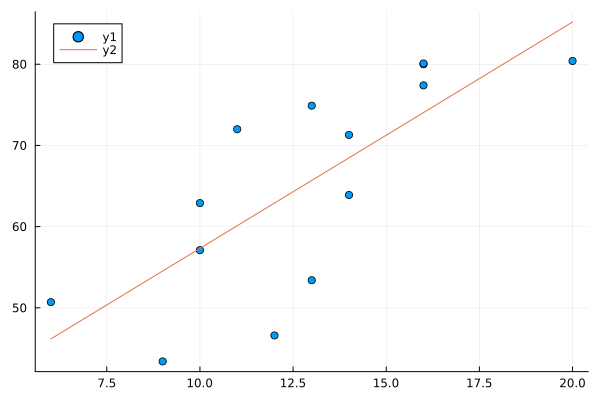

In [2]:
#= 
View the video for the full table 
xdata is the average length of schooling in years
ydata is the life expectancy
=#
xdata = [20; 14; 12; 11; 6; 10; 13; 10; 14; 9; 13; 16; 16;16]
ydata = [80.4; 63.9; 46.6; 72.0; 50.7; 57.1; 74.9; 62.9; 71.3; 43.4; 53.4; 80.0; 80.1; 77.4]

#Scatter plot of original data
scatter(xdata, ydata)

#Using Linear Regression
N = length(xdata)
#Regressor Matrix
Phi = [xdata ones(N,1)]
#Vector of measurements
Y = ydata

#Use LU factorization to solve for the vector of unknowns
F = lu(Phi'*Phi)
y = forwardSub(F.L, F.P*(Phi'*Y))
alphaStar = backwardSub(F.U,y)

#=
a[1] represents the slope of the line
a[2] represents the y-intercept of the line
=#
println("Here is alphaStar:")
@show alphaStar

#=
Error
=#
println("\n Here is the smallest error found for the linear regression: ")
@show errorLinear = norm(Y - (Phi*alphaStar))
println("This is a terrible number! Not very close to zero at all")

#Put the best fit line on top of the scatter plot data
yHat = Phi*alphaStar
plot!(xdata,yHat)



---



Your Turn! 😄 Find a better model!



In [3]:
#=
I've copied x and y data for you so you don't have to retype it
=# 
xdata = [20; 14; 12; 11; 6; 10; 13; 10; 14; 9; 13; 16; 16;16]
ydata = [80.4; 63.9; 46.6; 72.0; 50.7; 57.1; 74.9; 62.9; 71.3; 43.4; 53.4; 80.0; 80.1; 77.4]

# Here is N and Y for you too! 
N = length(xdata)
Y = ydata

14-element Vector{Float64}:
 80.4
 63.9
 46.6
 72.0
 50.7
 57.1
 74.9
 62.9
 71.3
 43.4
 53.4
 80.0
 80.1
 77.4

**Name your error,** `errorNew` **so the auto-grader can differentiate between your new error and the error obtained from the linear regression. You do not need to display a plot! All I want to see is a creative** `Phi` **and an** `errorNew` **that produces a result less than** `19`



Here is alphaStar2:
alphaStar2 = [891081.3558410852, -222571.18545988124, 27143.792898780237, -1392.107376780229, -25.562422643533363, 6.149789732020486, -0.19036058736173112, -0.0032668511503241493, 0.00014395266224372482, 6.108802160243742e-6, -2.0768602923482233e-7, -1.423882959417075e6]

 Here is the smallest error found: 
errorNew = norm(Y - Phi2 * alphaStar2) = 16.807907666498185


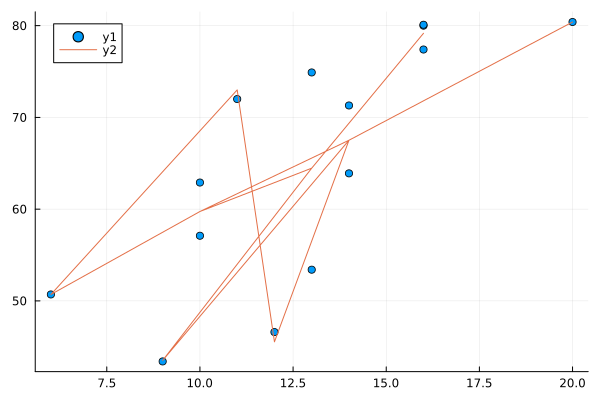

In [11]:
#Use quadratic equation to fit the data

Phi2 = [xdata.^(xdata) sin.(xdata.^5).*xdata.^5 xdata.^4 xdata.^3 xdata.^2 xdata ones(N,1)];

#Use LU factorization to solve for the vector of unknowns
F = lu(Phi2'*Phi2);
y = forwardSub(F.L, F.P*(Phi2'*Y));
alphaStar2 = backwardSub(F.U,y);

println("Here is alphaStar2:")
@show alphaStar2

#=
Error
=#
println("\n Here is the smallest error found: ")
@show errorNew = norm(Y - (Phi2*alphaStar2))

#Put the best fit graph on top of the scatter plot data
yHat2 = Phi2*alphaStar2

#Plot
scatter(xdata, ydata)
plot!(xdata,yHat2)



HAVE FUN! The lowest I got from playing around for a little bit is **~16**. Can you match that error or better (better = smaller)?

